<a href="https://colab.research.google.com/github/samiramunir/Classifying-Painting-Art-Style-With-Deep-Learning/blob/master/painting_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Painting Classifier

## Importing Images into Colab

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd gdrive/My\ Drive

/content/gdrive/My Drive


## Image Preprocessing with Keras

In [0]:

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

directory = 'images/'

data_all = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        directory, 
        target_size=(256, 256), 
        batch_size = 2500) 


Found 5009 images belonging to 5 classes.


In [0]:

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

directory = 'images/'

data_test = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        directory, 
        target_size=(256, 256), 
        batch_size = 400) 

Using TensorFlow backend.


Found 5009 images belonging to 5 classes.


In [0]:
x_test, y_test = next(data_test)

In [0]:
images, labels = next(data_all)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)

# Testing Models

In [0]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt

from keras import models
from keras import layers
from keras import regularizers

from keras.layers import Dense, GlobalAveragePooling2D, Conv2D
from keras.applications import MobileNet, VGG19
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam, sgd
from keras.activations import relu, tanh, sigmoid

from sklearn.metrics import confusion_matrix

## Model 1: VGG19 + 3 Dense Layers (tanh) + SGD

In [0]:
base_model=VGG19(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='tanh')(x)
x=Dense(512,activation='tanh')(x)
x=Dense(100, activation = 'tanh')(x)
preds = Dense(5, activation='softmax')(x)#final layer with softmax activation

80142336/80134624 [==============================] - 3s 0us/step


In [0]:
model=Model(inputs=base_model.input,outputs=preds)

In [0]:
for layer in model.layers[:22]:
    layer.trainable=False
for layer in model.layers[22:]:
    layer.trainable=True

In [0]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

In [0]:
results = model.fit(x_train, y_train, epochs=25, batch_size=20, validation_data=(x_val, y_val))

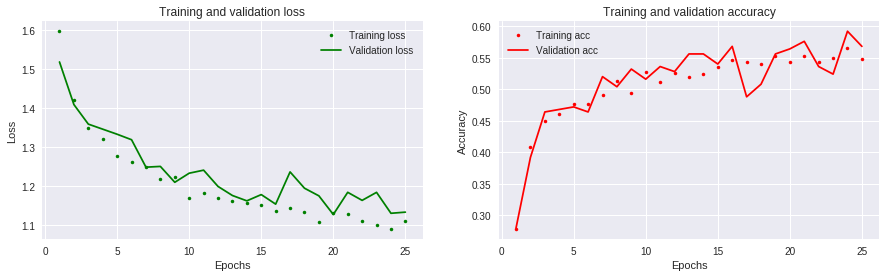

In [0]:
hist = results.history
loss_values = hist['loss']
val_loss_values = hist['val_loss']
acc_values = hist['acc'] 
val_acc_values = hist['val_acc']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [0]:
y_pred = model.predict(x_test)

In [0]:
y_test.shape

(250, 5)

In [0]:
model.save('model1.h5')
model.save_weights('model1_weights.h5')

In [0]:
from keras.models import load_model
model1 = load_model('mod4-models/model1.h5')
model1.load_weights('mod4-models/model1_weights.h5')
model1.evaluate(x_test, y_test)

In [0]:
model1.evaluate(x_test, y_test)

400/400 [==============================] - 13s 32ms/step


[1.1268765306472779, 0.5725]

## Model 2: VGG + 4 Dense Layers (relu) + SGD

In [0]:
base_model=VGG19(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x=Dense(720,activation='relu')(x)
x=Dense(512,activation='relu')(x)
x=Dense(100, activation = 'relu')(x)
preds = Dense(5, activation='softmax')(x)#final layer with softmax activation

80142336/80134624 [==============================] - 3s 0us/step


In [0]:
model2=Model(inputs=base_model.input,outputs=preds)
for layer in model2.layers[:22]:
    layer.trainable=False
for layer in model2.layers[22:]:
    layer.trainable=True

In [0]:
model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

In [0]:
results = model2.fit(x_train, y_train, epochs=20, batch_size=40, validation_data=(x_val, y_val))

Train on 3200 samples, validate on 400 samples
Epoch 1/20
3200/3200 [==============================] - 57s 18ms/step - loss: 1.5309 - acc: 0.3491 - val_loss: 1.4533 - val_acc: 0.4975
Epoch 2/20
3200/3200 [==============================] - 51s 16ms/step - loss: 1.4103 - acc: 0.4428 - val_loss: 1.3538 - val_acc: 0.5050
Epoch 3/20
3200/3200 [==============================] - 51s 16ms/step - loss: 1.3346 - acc: 0.4544 - val_loss: 1.3035 - val_acc: 0.4950
Epoch 4/20
3200/3200 [==============================] - 51s 16ms/step - loss: 1.2877 - acc: 0.4831 - val_loss: 1.2917 - val_acc: 0.4425
Epoch 5/20
3200/3200 [==============================] - 51s 16ms/step - loss: 1.2654 - acc: 0.4875 - val_loss: 1.2305 - val_acc: 0.5200
Epoch 6/20
3200/3200 [==============================] - 51s 16ms/step - loss: 1.2398 - acc: 0.4975 - val_loss: 1.2173 - val_acc: 0.5175
Epoch 7/20
3200/3200 [==============================] - 51s 16ms/step - loss: 1.2080 - acc: 0.5112 - val_loss: 1.2078 - val_acc: 0.5325
E

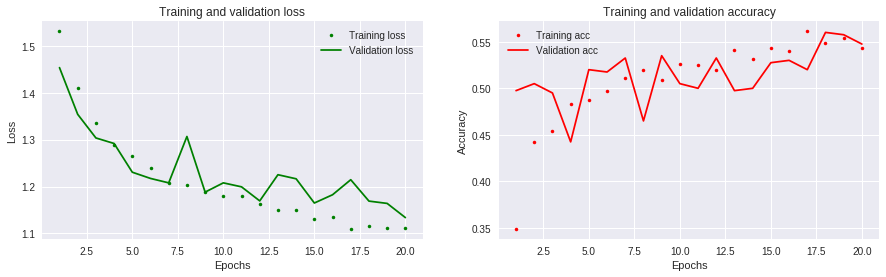

In [0]:
hist = results.history
loss_values = hist['loss']
val_loss_values = hist['val_loss']
acc_values = hist['acc'] 
val_acc_values = hist['val_acc']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
model2.save('model2.h5')
model2.save_weights('model2_weights.h5')

In [0]:
model2 = load_model('mod4-models/model2.h5')
model2.load_weights('mod4-models/model2_weights.h5')
model2.evaluate(x_test, y_test)

400/400 [==============================] - 5s 14ms/step


[1.0894414854049683, 0.5525]

## Model 3: VGG + 4 Dense Layers (tanh) + Adam

In [0]:

base_model=VGG19(weights='imagenet',include_top=False) 
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='tanh')(x)
x=Dense(720,activation='tanh')(x)
x=Dense(512,activation='tanh')(x)
x=Dense(100, activation = 'tanh')(x)
preds = Dense(5, activation='softmax')(x)

80142336/80134624 [==============================] - 1s 0us/step


In [0]:
model3=Model(inputs=base_model.input,outputs=preds)
for layer in model3.layers[:22]:
    layer.trainable=False
for layer in model3.layers[22:]:
    layer.trainable=True
model3.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['acc'])

In [0]:
results = model3.fit(x_train, y_train, epochs=15, batch_size=40, validation_data=(x_val, y_val))

Train on 2000 samples, validate on 250 samples
Epoch 1/15
2000/2000 [==============================] - 38s 19ms/step - loss: 1.7874 - acc: 0.2685 - val_loss: 1.4713 - val_acc: 0.3720
Epoch 2/15
2000/2000 [==============================] - 33s 16ms/step - loss: 1.3689 - acc: 0.4035 - val_loss: 1.3073 - val_acc: 0.4480
Epoch 3/15
2000/2000 [==============================] - 33s 16ms/step - loss: 1.3132 - acc: 0.4400 - val_loss: 1.1830 - val_acc: 0.4960
Epoch 4/15
2000/2000 [==============================] - 33s 16ms/step - loss: 1.2178 - acc: 0.4905 - val_loss: 1.2363 - val_acc: 0.4760
Epoch 5/15
2000/2000 [==============================] - 33s 16ms/step - loss: 1.2075 - acc: 0.5010 - val_loss: 1.1917 - val_acc: 0.4960
Epoch 6/15
2000/2000 [==============================] - 33s 16ms/step - loss: 1.1526 - acc: 0.5320 - val_loss: 1.1678 - val_acc: 0.5160
Epoch 7/15
2000/2000 [==============================] - 33s 16ms/step - loss: 1.0883 - acc: 0.5560 - val_loss: 1.1197 - val_acc: 0.5720
E

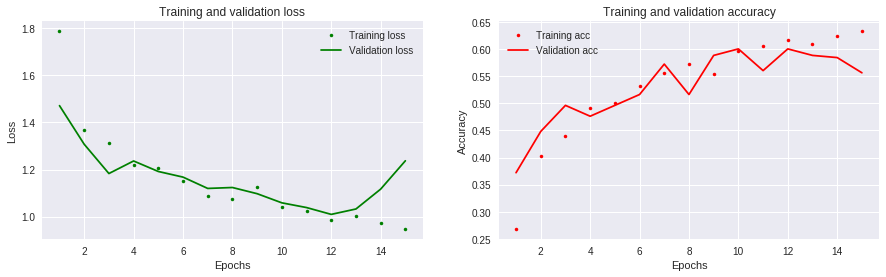

In [0]:
hist = results.history
loss_values = hist['loss']
val_loss_values = hist['val_loss']
acc_values = hist['acc'] 
val_acc_values = hist['val_acc']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
model3.save('model3.h5')
model3.save_weights('model3_weights.h5')

In [0]:
model3 = load_model('mod4-models/model3.h5')
model3.load_weights('mod4-models/model3_weights.h5')
model3.evaluate(x_test, y_test)

400/400 [==============================] - 5s 14ms/step


[1.0027569484710694, 0.6125]

## Model 4: VGG + 4 Dense Layers (relu) + Adam

In [0]:
base_model=VGG19(weights='imagenet',include_top=False)
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x=Dense(720,activation='relu')(x)
x=Dense(512,activation='relu')(x)
x=Dense(100, activation = 'relu')(x)
preds = Dense(5, activation='softmax')(x)

In [0]:
model4=Model(inputs=base_model.input,outputs=preds)
for layer in model4.layers[:22]:
    layer.trainable=False
for layer in model4.layers[22:]:
    layer.trainable=True
model4.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['acc'])

In [0]:
results = model4.fit(x_train, y_train, epochs=15, batch_size=40, validation_data=(x_val, y_val))

Train on 2000 samples, validate on 250 samples
Epoch 1/15
2000/2000 [==============================] - 33s 17ms/step - loss: 1.3852 - acc: 0.3990 - val_loss: 1.1949 - val_acc: 0.5120
Epoch 2/15
2000/2000 [==============================] - 32s 16ms/step - loss: 1.2151 - acc: 0.4940 - val_loss: 1.1160 - val_acc: 0.5080
Epoch 3/15
2000/2000 [==============================] - 32s 16ms/step - loss: 1.1735 - acc: 0.5110 - val_loss: 1.1292 - val_acc: 0.4920
Epoch 4/15
2000/2000 [==============================] - 32s 16ms/step - loss: 1.1389 - acc: 0.5310 - val_loss: 1.1048 - val_acc: 0.5160
Epoch 5/15
2000/2000 [==============================] - 32s 16ms/step - loss: 1.0697 - acc: 0.5625 - val_loss: 1.0922 - val_acc: 0.5560
Epoch 6/15
2000/2000 [==============================] - 32s 16ms/step - loss: 1.0611 - acc: 0.5705 - val_loss: 1.0516 - val_acc: 0.5720
Epoch 7/15
2000/2000 [==============================] - 32s 16ms/step - loss: 1.0541 - acc: 0.5860 - val_loss: 1.1854 - val_acc: 0.5080
E

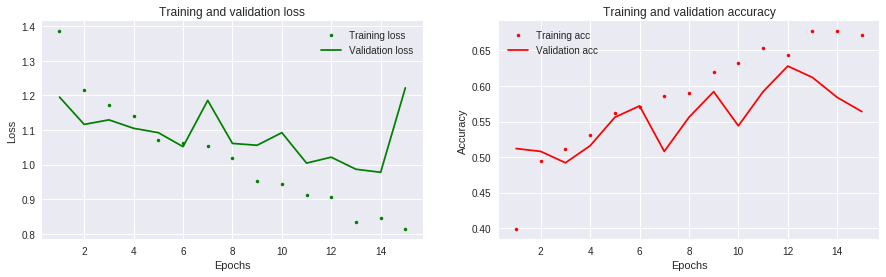

In [0]:
hist = results.history
loss_values = hist['loss']
val_loss_values = hist['val_loss']
acc_values = hist['acc'] 
val_acc_values = hist['val_acc']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
model4.save('model4.h5')
model4.save_weights('model4_weights.h5')

In [0]:
model4 = load_model('mod4-models/model4.h5')
model4.load_weights('mod4-models/model4_weights.h5')
model4.evaluate(x_test, y_test)

400/400 [==============================] - 5s 14ms/step


[0.8303185272216796, 0.68]

# Archive

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(128, (5, 5), strides =5, padding='SAME', activation='tanh', input_shape=(256,256,3)))

model.add(layers.Conv2D(64, (5, 5), strides =5, padding='SAME', activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.1),
              metrics=['acc'])

In [0]:
history = model.fit(x_train, y_train, epochs=30, batch_size=30, validation_data=(x_val, y_val))

In [0]:
model2 = models.Sequential()
model2.add(layers.Conv2D(16, (5, 5), strides =5, padding='SAME', activation='tanh', input_shape=(256,256,3)))

model2.add(layers.Conv2D(32, (5, 5), strides =5, padding='SAME', activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(5, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [0]:
history = model2.fit(x_train, y_train, epochs=100, batch_size=50, validation_data=(x_val, y_val))

Train on 2000 samples, validate on 250 samples
Epoch 1/100
2000/2000 [==============================] - 2s 1ms/step - loss: 1.6053 - acc: 0.2005 - val_loss: 1.6019 - val_acc: 0.2040
Epoch 2/100
2000/2000 [==============================] - 2s 882us/step - loss: 1.6000 - acc: 0.2320 - val_loss: 1.5980 - val_acc: 0.2440
Epoch 3/100
2000/2000 [==============================] - 2s 876us/step - loss: 1.5971 - acc: 0.2630 - val_loss: 1.5964 - val_acc: 0.2320
Epoch 4/100
2000/2000 [==============================] - 2s 878us/step - loss: 1.5936 - acc: 0.2495 - val_loss: 1.5925 - val_acc: 0.2680
Epoch 5/100
2000/2000 [==============================] - 2s 906us/step - loss: 1.5905 - acc: 0.2675 - val_loss: 1.5955 - val_acc: 0.2560
Epoch 6/100
2000/2000 [==============================] - 2s 895us/step - loss: 1.5896 - acc: 0.2805 - val_loss: 1.5903 - val_acc: 0.2400
Epoch 7/100
2000/2000 [==============================] - 2s 883us/step - loss: 1.5853 - acc: 0.2850 - val_loss: 1.5886 - val_acc: 0.2

In [0]:
results_train = model2.evaluate(x_train, y_train)
results_test = model2.evaluate(x_test, y_test)
print(results_train, results_test)

500/500 [==============================] - 0s 594us/step
[0.6936997840404511, 0.79025] [1.5094636135101318, 0.4199999997615814]


In [0]:
model3 = models.Sequential()
model3.add(layers.Conv2D(16, (5, 5), strides =5, padding='SAME', activation='tanh', input_shape=(256,256,3)))

model3.add(layers.Conv2D(32, (5, 5), strides =5, padding='SAME', activation='tanh'))

model3.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Flatten())
model.add(layers.Dropout(0.4, input_shape=(2000,)))
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(5, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer="sgd",
              metrics=['acc'])